<a href="https://colab.research.google.com/github/shabnajL/Facial_Expression_Recognition/blob/main/Facial_Expression_Recognition(with_PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset available at kaggle

https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

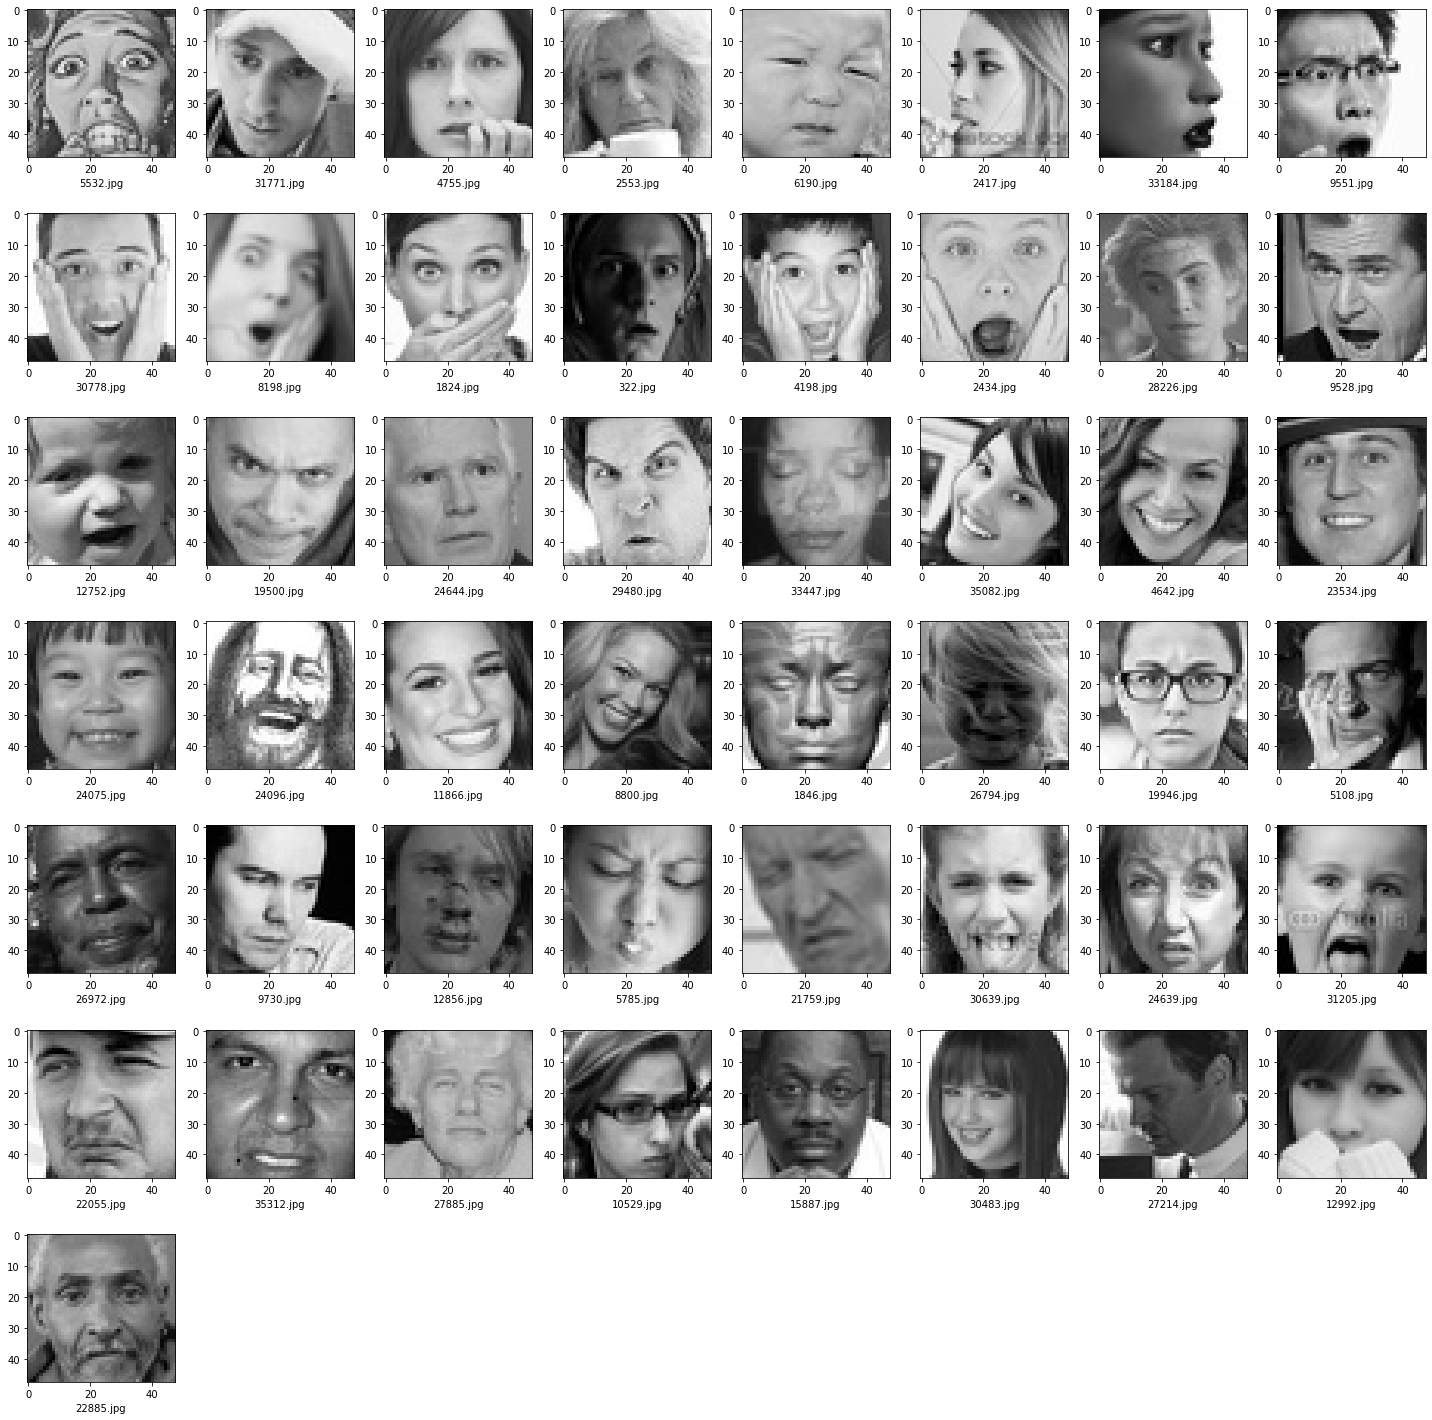

# Install libraries, packages and dataset

In [ ]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install timm
!pip install --upgrade opencv-contrib-python

Cloning into 'Facial-Expression-Dataset'...
remote: Enumerating objects: 34052, done.
remote: Total 34052 (delta 0), reused 0 (delta 0), pack-reused 34052 (from 1)
Receiving objects: 100% (34052/34052), 52.31 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35887/35887), done.
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-hhzlidsk
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-hhzlidsk
  Resolved https://github.com/albumentations-team/albumentations to commit b358a8826de3bbd853d55a672f0b4d20c59bf5ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Configurations

In [ ]:
TRAINING_IMG_PATH = "/content/Facial-Expression-Dataset/train"
VALIDATION_IMG_PATH = "/content/Facial-Expression-Dataset/validation"

LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 15

#DEVICE = 'CUDA'
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"

DEVICE = torch.device(DEVICE)

MODEL_NAME = 'EFFICIENTNET B0'

# Load Dataset

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [ ]:
train_augs = T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.RandomRotation(degrees=(-20, +20)),
    T.ToTensor()        #PIL/numpy.arr -> pytorch tensor(height, width, channel) -> (channel, height, width)
])

valid_augs = T.Compose([
    T.ToTensor()        #PIL/numpy.arr -> pytorch tensor(height, width, channel) -> (channel, height, width)
])

In [ ]:
trainset = ImageFolder(TRAINING_IMG_PATH, transform= train_augs)
validset = ImageFolder(VALIDATION_IMG_PATH, transform= valid_augs)

In [ ]:
print(f"Total no. of examples in trainset : {len(trainset)}")
print(f"Total no. of examples in validset : {len(validset)}")

Total no. of examples in trainset : 28821
Total no. of examples in validset : 7066


In [ ]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Text(0.5, 1.0, '0')

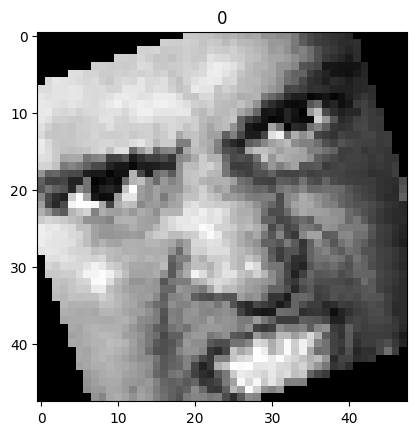

In [ ]:
#testNum = 0
#testNum = 9723
testNum = 3029


image, label = trainset[testNum]

plt.imshow(image.permute(1, 2, 0)) #will take the image in (h, w, c) format

plt.title(label)

# Load Dataset into Batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
validloader = DataLoader(validset, batch_size = BATCH_SIZE)

In [ ]:
print(f"Total no. of batches in trainloader : {len(trainloader)}")
print(f"Total no. of batches in validloader : {len(validloader)}")

Total no. of batches in trainloader : 901
Total no. of batches in validloader : 221


In [ ]:
for images, labels in trainloader:
  break

print(f"One image batch shape : {images.shape}") # output will be => torch.Size([batch_size, channel, height, width])
print(f"One label batch shape : {labels.shape}")

One image batch shape : torch.Size([32, 3, 48, 48])
One label batch shape : torch.Size([32])


# Create Model

In [ ]:
!pip install timm

In [ ]:
import timm
from torch import nn

In [ ]:
class faceModel(nn.Module):
  def __init__(self):
    super(faceModel, self).__init__()
    self.efficient_net = timm.create_model('efficientnet_b0', pretrained = True, num_classes = 7)

  def forward(self, images, labels = None):
    logits = self.efficient_net(images)
    if labels != None:
      loss = nn.CrossEntropyLoss()(logits, labels)
      return logits, loss

    return logits


In [ ]:
model = faceModel()
model.to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

faceModel(
  (efficient_net): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (aa): Identity()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw)

In [ ]:
print(faceModel)
print(faceModel.__init__.__doc__)

<class '__main__.faceModel'>
None


# Create Train and Eval Function

In [ ]:
from tqdm import tqdm

In [ ]:
def multiclass_accuracy(y_pred, y_true):
    top_p, top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)

    return torch.mean(equals.type(torch.FloatTensor))

In [ ]:
def train_func(model, dataloader, optimizer, current_epoch):

  model.train()
  total_loss, total_accuracy = 0.0, 0.0
  tk = tqdm(dataloader, desc = "EPOCH" + "[TRAIN]" + str(current_epoch + 1) + "/" + str(EPOCHS))

  for i, data in enumerate(tk):
    images, labels = data
    iamges, labels = images.to(DEVICE), labels.to(DEVICE)

    optimizer.zero_grad()
    logits, loss = model(images, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_accuracy += multiclass_accuracy(logits, labels)
    tk.set_postfix({'loss' : '%5f' %float(total_loss/(i+1)), 'accuracy' : '%5f' %float(total_accuracy/(i+1))})

  return (total_loss/len(dataloader)), (total_accuracy/len(dataloader))

In [ ]:
def eval_func(model, dataloader, current_epoch):

  model.eval()
  total_loss, total_accuracy = 0.0, 0.0
  tk = tqdm(dataloader, desc = "EPOCH" + "[VALID]" + str(current_epoch + 1) + "/" + str(EPOCHS))

  for i, data in enumerate(tk):
    images, labels = data
    iamges, labels = images.to(DEVICE), labels.to(DEVICE)

    logits, loss = model(images, labels)

    total_loss += loss.item()
    total_accuracy += multiclass_accuracy(logits, labels)
    tk.set_postfix({'loss' : '%5f' %float(total_loss/(i+1)), 'accuracy' : '%5f' %float(total_accuracy/(i+1))})

  return (total_loss/len(dataloader)), (total_accuracy/len(dataloader))

# Create Training Loop

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

EPOCH[VALID]1/15: 100%|██████████| 221/221 [00:42<00:00,  5.23it/s, loss=1.013705, accuracy=0.638520]


BEST WEIGHTS SAVED.


EPOCH[VALID]2/15: 100%|██████████| 221/221 [00:40<00:00,  5.48it/s, loss=0.997784, accuracy=0.633669]


BEST WEIGHTS SAVED.


EPOCH[VALID]3/15: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s, loss=0.992747, accuracy=0.646297]


BEST WEIGHTS SAVED.


EPOCH[VALID]4/15: 100%|██████████| 221/221 [00:39<00:00,  5.53it/s, loss=0.991767, accuracy=0.649669]


BEST WEIGHTS SAVED.


EPOCH[VALID]15/15: 100%|██████████| 221/221 [00:41<00:00,  5.28it/s, loss=1.120600, accuracy=0.641522]


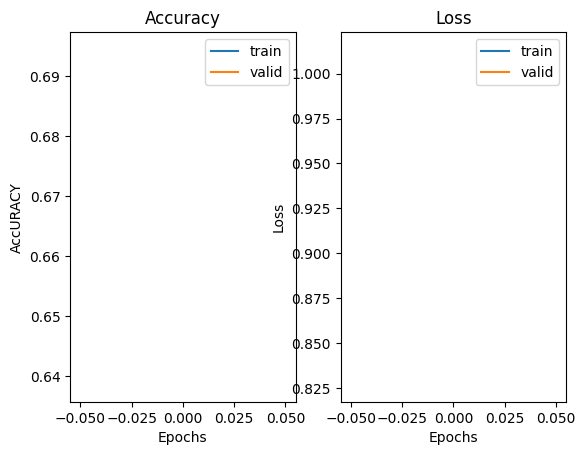

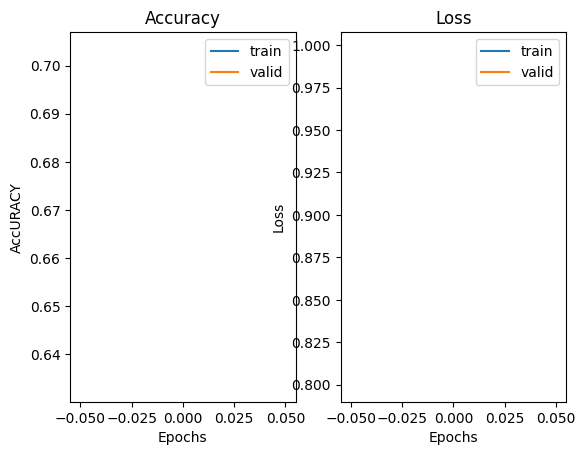

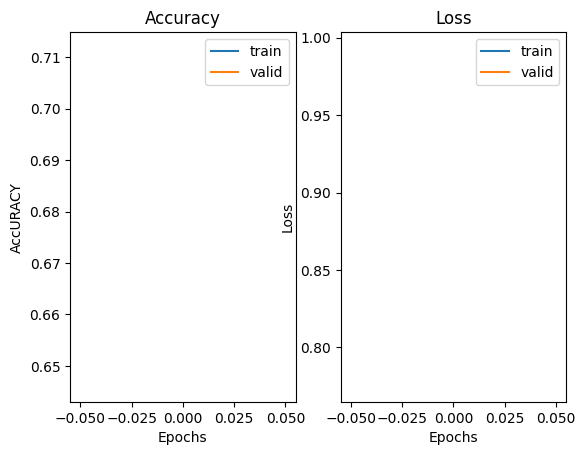

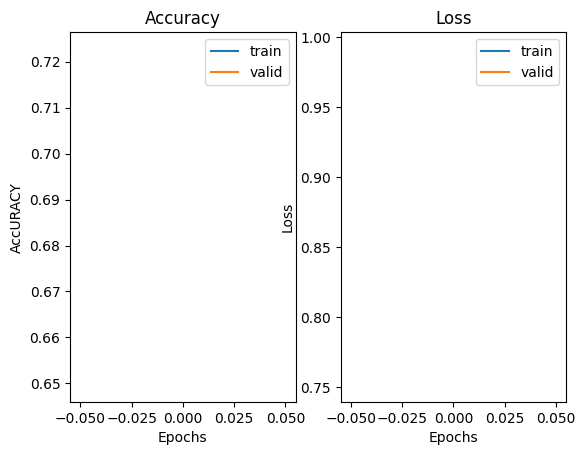

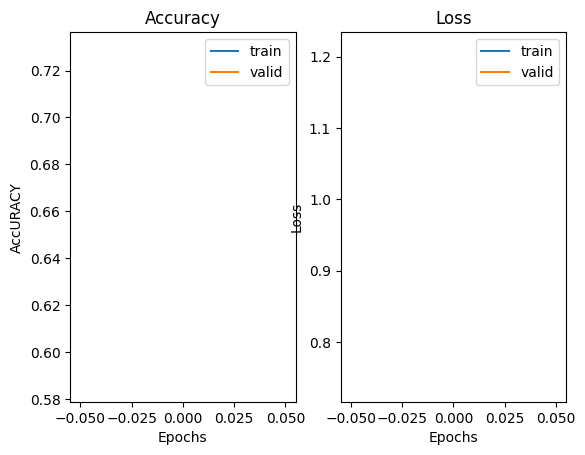

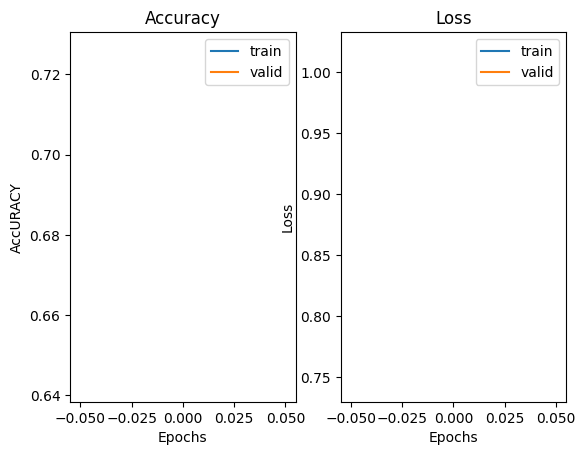

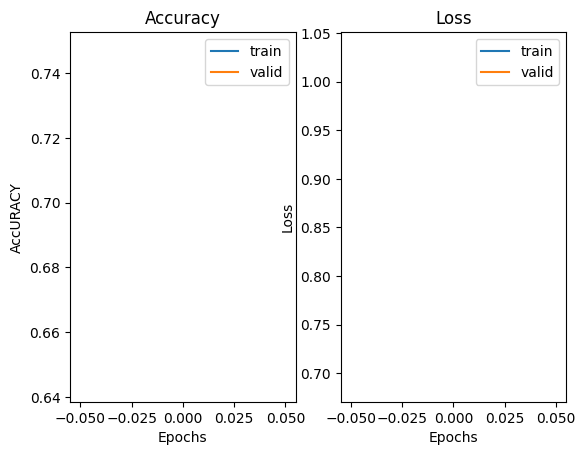

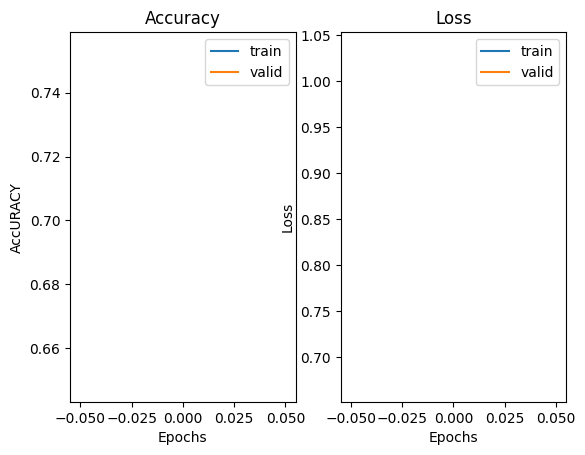

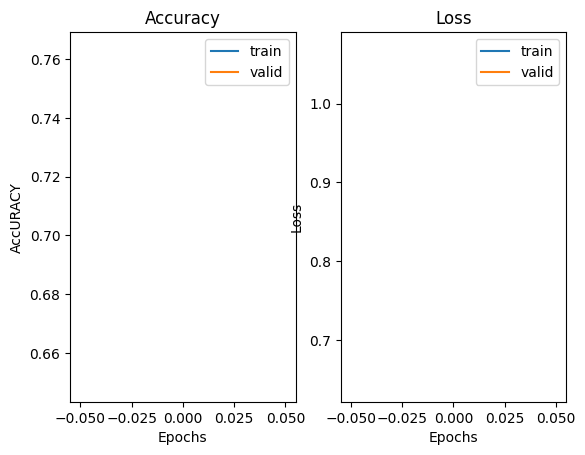

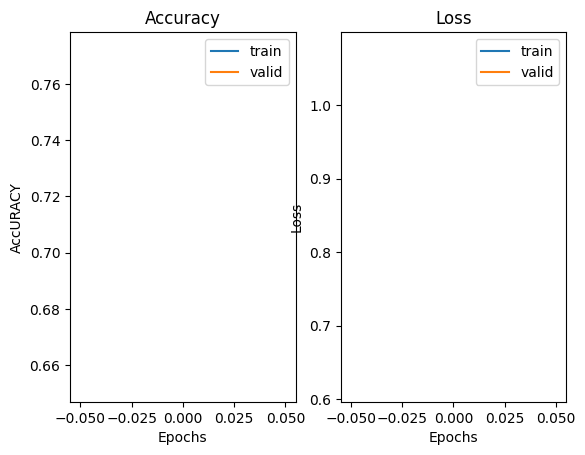

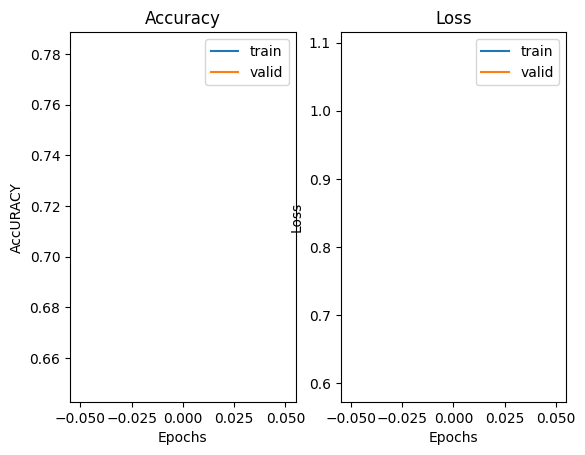

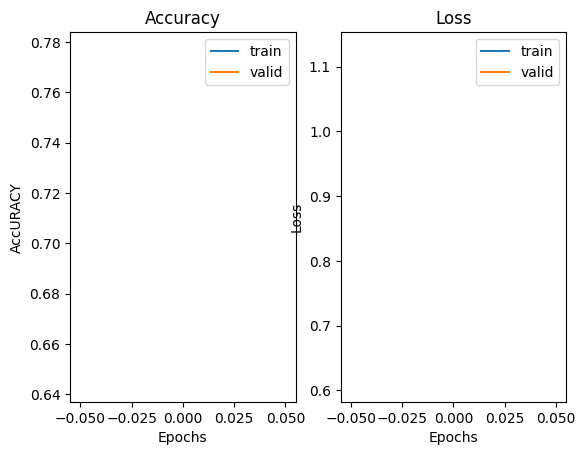

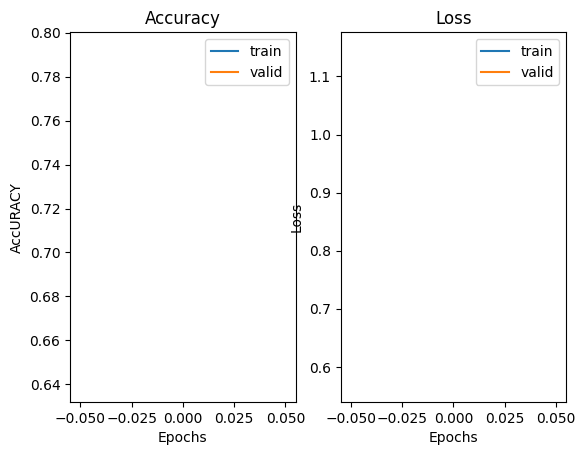

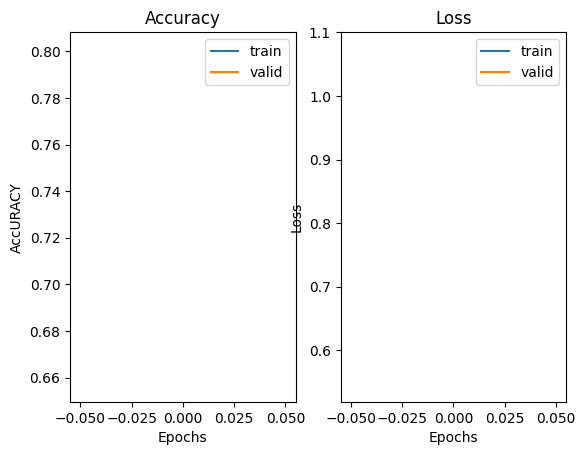

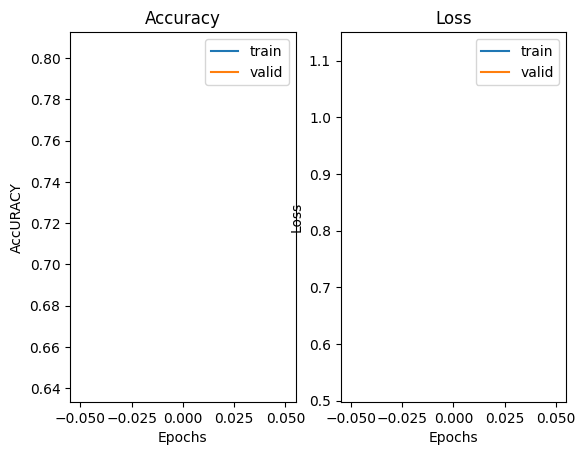

In [63]:
best_valid_loss = np.Inf

for i in range(EPOCHS):
  train_loss, train_accuracy = train_func(model, trainloader, optimizer, i)
  valid_loss, valid_accuracy = eval_func(model, validloader, i)

  if(valid_loss < best_valid_loss):
    torch.save(model.state_dict(), 'best-weights.pt')
    print("BEST WEIGHTS SAVED.")
    best_valid_loss = valid_loss

  fig = plt.figure()
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  ax1.plot(train_accuracy, label='train')
  ax1.plot(valid_accuracy, label='valid')
  ax1.set_title('Accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('AccURACY')
  ax1.legend()
  ax2.plot(train_loss, label='train')
  ax2.plot(valid_loss, label='valid')
  ax2.set_title('Loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.legend()

plt.show()

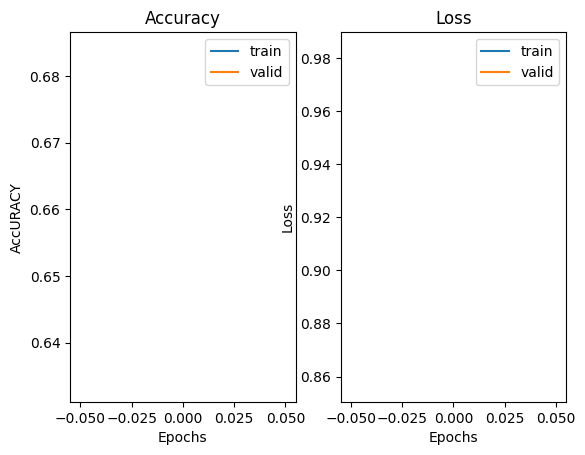

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(train_accuracy, label='train')
ax1.plot(valid_accuracy, label='valid')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('AccURACY')
ax1.legend()
ax2.plot(train_loss, label='train')
ax2.plot(valid_loss, label='valid')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.show()

# Inference

In [ ]:
def view_classify(img, ps):

    classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    ps = ps.data.cpu().numpy().squeeze()
    img = img.numpy().transpose(1,2,0)

    fig, (ax1, ax2) = plt.subplots(figsize=(5,9), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    return None

**TESTING THE MODEL'S OUTPUT**

Text(0.5, 1.0, '0')

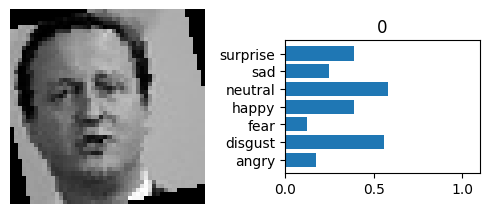

In [66]:
testNum = 29
image, label = trainset[testNum]
ps = torch.rand(7)
view_classify(image, ps)
plt.title(label)

Text(0.5, 1.0, '0')

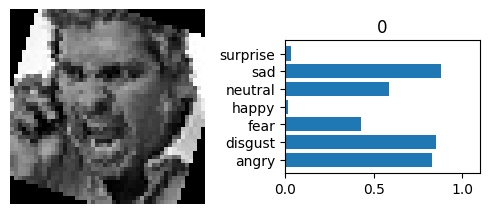

In [67]:
testNum = 1019
image, label = trainset[testNum]
ps = torch.rand(7)
view_classify(image, ps)
plt.title(label)

Text(0.5, 1.0, '0')

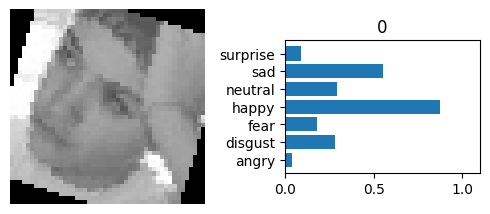

In [68]:
testNum = 119
image, label = trainset[testNum]
ps = torch.rand(7)
view_classify(image, ps)
plt.title(label)